# Python Data Science

## Step 1: Import Libraries

In [37]:
#import library: pd for dataframe, sns for plot graphs, scikit learn for prediction, pipeline for easier data processing.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import aiohttp
import asyncio
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

## Step 2: Import Dataset (Data obtained from Github, so credit to the owner of the data.)

In [38]:
#Download function
async def download(url, filename):
    async with aiohttp.ClientSession() as session:
        async with session.get(url) as response:
            if response.status == 200:
                content = await response.text()

                with open(filename, "w") as f:
                    f.write(content)
            else:
                print(f"Failed to download {url}. Status code: {response.status}")

In [39]:
path = "https://raw.githubusercontent.com/mdrilwan/datasets/master/flights.csv"

await download(path, "flights_ticket.csv")
file_name = "flights_ticket.csv"

In [40]:
df = pd.read_csv(file_name)
df.head(2)

,AvgTicketPrice,Cancelled,Dest,DestAirportID,DestCityName,DestCountry,DestLocation,DestRegion,DestWeather,DistanceKilometers,...,FlightTimeMin,Origin,OriginAirportID,OriginCityName,OriginCountry,OriginLocation,OriginRegion,OriginWeather,dayOfWeek,hour_of_day
0,$668.22,False,San Francisco International Airport,SFO,San Francisco,US,"{\n ""lat"": ""37.61899948"",\n ""lon"": ""-122.375...",US-CA,Sunny,"10,260.84",...,488.611,Naples International Airport,NA01,Naples,IT,"{\n ""lat"": ""40.886002"",\n ""lon"": ""14.2908""\n}",IT-72,Sunny,5,16
1,$519.25,False,Tulsa International Airport,TUL,Tulsa,US,"{\n ""lat"": ""36.19839859"",\n ""lon"": ""-95.8880...",US-OK,Sunny,"4,137.26",...,376.115,El Dorado International Airport,BOG,Bogota,CO,"{\n ""lat"": ""4.70159"",\n ""lon"": ""-74.1469""\n}",SE-BD,Rain,5,16


## 1: Single Linear Regression (Distance of Flight vs Flight Ticket)

In [52]:
#Check the data type first
#df.info()
#Since Ticket Price/Distance(km) are object, let's convert them into float
#Step 1: 'AvgTicketPrice' column has '$' sign , I want to remove it
df['AvgTicketPrice'] = df['AvgTicketPrice'].str.replace('$', '')
df['AvgTicketPrice'] = df['AvgTicketPrice'].str.replace(',', '').astype(float)
df['DistanceKilometers'] = df['DistanceKilometers'].str.replace(',', '').astype(float)

/var/folders/96/wzzpc1p91h19g0z_r5fq42w00000gn/T/ipykernel_74652/570133721.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['AvgTicketPrice'] = df['AvgTicketPrice'].str.replace('$', '')


In [57]:
#Set up LR object
lr = LinearRegression()

#X as the independent variable, and y as the dependent, which we want to see
X = df[['DistanceKilometers']]
Y = df[['AvgTicketPrice']]

#ft the model
lr.fit(X,Y)

#print coefficient / intercept and get the equation 
coeff = lr.coef_
intercpt = lr.intercept_
print(f'Equation is: y = {coeff}* x + {intercpt}')

#finally, prediction
Yhat = lr.predict(X)

Equation is: y = [[0.01797754]]* x + [611.93178242]


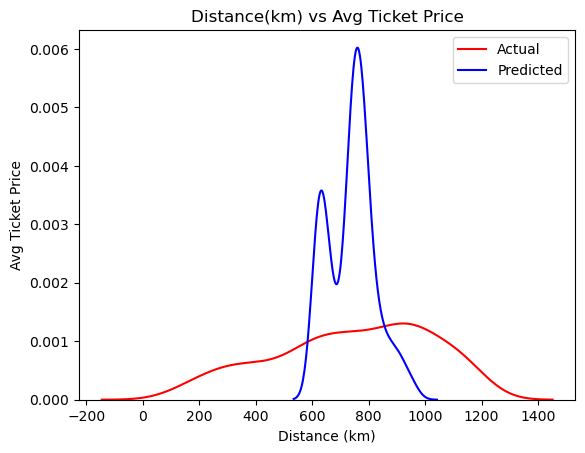

In [63]:
pred_plot = sns.distplot(df['AvgTicketPrice'], hist=False, color='r',label = 'Actual Avg Price of Ticket')

sns.distplot(Yhat, hist=False, color='b', label = 'Predicted plot', ax=pred_plot)

plt.title("Distance(km) vs Avg Ticket Price")
plt.xlabel("Distance (km)")
plt.ylabel("Avg Ticket Price")

plt.legend(['Actual', 'Predicted'])
plt.show()

In [64]:
#The graph enabled me to learn that distance has little effect on the price. Let's see their correlation

mse = mean_squared_error(Y,Yhat)
r2 = r2_score(Y,Yhat)

print(f'MSE/R2-Score of Distance and Price are: {mse} and {r2} respectively')

MSE/R2-Score of Distance and Price are: 69503.85894242508 and 0.08805804436199627 respectively
